In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [458]:
data = pd.read_csv("C:\\Users\\ASMITPAUL\\Downloads\\weatherAUS.csv")
data = pd.DataFrame(data)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [459]:
for column in data.columns:
    if data[column].dtype == "float64":
        data[column] = data[column].replace(np.nan, np.mean(data[column]))

for column in ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']:
    data[column] = data[column].replace(np.nan, data[column].value_counts().idxmax())
    
    dataUnique = list(set(data[column]))
    
    for i in dataUnique:
        data[column] = data[column].replace(i, dataUnique.index(i))
        
for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min())/(data[i].max() - data[i].min())

df = data[data.columns[1:]]
df = pd.DataFrame(df)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.645833,0.516509,0.523629,0.001617,0.037712,0.524909,0.066667,0.294574,0.066667,0.866667,...,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.0,0.0
1,0.645833,0.375000,0.565217,0.000000,0.037712,0.524909,0.866667,0.294574,0.666667,0.533333,...,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.0,0.0
2,0.645833,0.504717,0.576560,0.000000,0.037712,0.524909,0.600000,0.310078,0.066667,0.533333,...,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.0,0.0
3,0.645833,0.417453,0.620038,0.000000,0.037712,0.524909,0.733333,0.139535,0.266667,0.200000,...,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.0,0.0
4,0.645833,0.613208,0.701323,0.002695,0.037712,0.524909,0.066667,0.271318,1.000000,0.133333,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.895833,0.266509,0.533081,0.000000,0.037712,0.524909,0.200000,0.193798,0.266667,1.000000,...,0.51,0.24,0.728926,0.6912,0.494162,0.501103,0.364979,0.533589,0.0,0.0
145456,0.895833,0.285377,0.568998,0.000000,0.037712,0.524909,0.666667,0.124031,0.266667,0.400000,...,0.56,0.21,0.710744,0.6720,0.494162,0.501103,0.381857,0.573896,0.0,0.0
145457,0.895833,0.327830,0.599244,0.000000,0.037712,0.524909,0.466667,0.240310,0.266667,0.866667,...,0.53,0.24,0.669421,0.6352,0.494162,0.501103,0.415612,0.604607,0.0,0.0
145458,0.895833,0.384434,0.601134,0.000000,0.037712,0.524909,0.333333,0.170543,0.333333,0.400000,...,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0.0,0.0


In [461]:
def clusterModel(X, k, iterations):
    centroids = X.sample(k).values
    
    for _ in range(iterations):
        
        distances = []
        for i in range(k):
            distance = (np.sqrt(np.sum(df - centroids[i], axis = 1)**2))
            distances.append(distance)
            
        distances = np.squeeze(distances)
        distances = distances.T
        
        labels = np.argmin(distances, axis = 1)
        
        for i in range(k):
            cluster_points = df[labels == i]
            centroids[i] = cluster_points.mean().values
            
    inertia = calculateInertia(X, centroids, labels)
    
    return labels, centroids, inertia

def calculateInertia(data, centroids, labels):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        inertia += np.sum(np.square(np.linalg.norm(cluster_points - centroids[i], axis=1)))
    return inertia

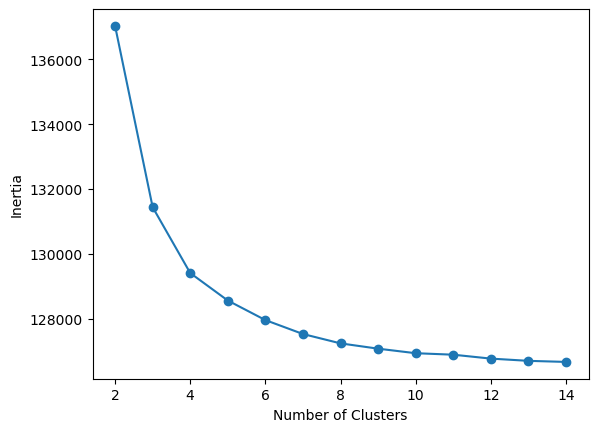

In [464]:
k_values = range(2, 15)
inertia_values = []

for k in k_values:
    labels, centroids, inertia = clusterModel(df, k, 100)
    inertia_values.append(inertia)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [465]:
labels, centroids, inertia = clusterModel(df, 10, 100)

In [466]:
df["Clusters"] = pd.DataFrame(labels)

In [467]:
covariance_matrix = np.cov(df.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]
eigen_vectors = eigen_vectors[:, sorted_indices]

df_PCA = df.dot(eigen_vectors[:, :2])

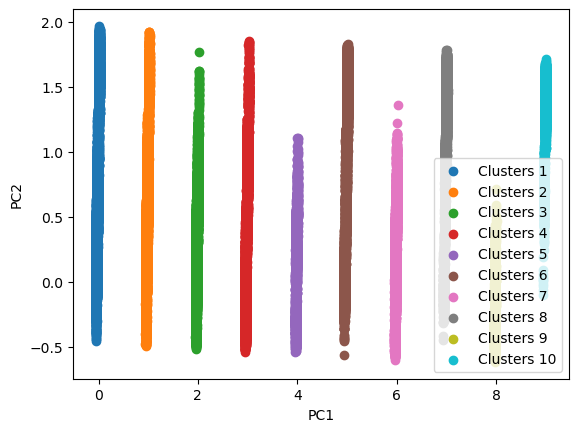

In [468]:
for cluster in range(10):
    cluster_data = df_PCA[df['Clusters'] == cluster]
    plt.scatter(cluster_data[0], cluster_data[1], label='Clusters {}'.format(cluster + 1))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [469]:
silhouette_score = metrics.silhouette_score(df, labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.27556521596197825


In [470]:
silhouette_score = metrics.silhouette_score(df_PCA, labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.6675093375813296
